# Before pulling more data, explore feature engineering with existing expiry vars

In [29]:
# install.packages("dominanceanalysis")

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)



In [3]:
library(tidyr)
library(dplyr)
library(lubridate)
library(ggplot2)
library(dominanceanalysis)
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [23]:

source('../orig/functions.R')

source('../orig/functions_models.R')

source('../phaseII_03_forest/functions_eval.R')


# source('../phaseII_03_forest/load_prep_data_expiry.R')

# expiry_train_prepped_2_1 (list, less df's w/ 0 obs)
# expiry_test_prepped_2_1  (list, less df's w/ 0 obs)
# expiry_train_df_1 (above, rbound)
# expiry_test_df_1 (above, rbound)
# expiry_train_df_sub (subset vars)                                        
# expiry_test_df_sub (subset vars)

## Load data 
(pulled July 6th, 36 days after final date)

In [3]:
filename = 'expiry_data'
system(paste(sprintf("gsutil cp gs://data_outputt/output/%s /home/jupyter/local/Domains_202003/data/", filename)))
expiry_data <- readRDS(file.path("/home/jupyter/local/Domains_202003/data", filename))

In [5]:
dim(expiry_data)
head(expiry_data)

[1] 1743356      27

,renewal_type,renewed_count,expiry_date,domain_id,domain,creation_date,status,tld,registrar,reseller,reseller_country,region,reg_period,registrant_country,renewal_status,renew_mbg,renew_type,autorenew_type,renew_date,renew_registrar,renew_reseller,reg_revenue,reg_arpt,renew_period,renew_domain_revenue,renew_arpt,reg_arpt_org
,<chr>,<int>,<date>,<int>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,Subsequent,3,2020-01-01,41639702,howtofundraise.online,2017-01-01,Active,online,name.com,name.com,United States,Non China,1,NA,Renewed,0,renewal,NA,2019-12-03,Name.com,Name.com,14.00,14.00,1,25.0,25.0,6.80
2,FirstTime,1,2020-01-01,89380597,strela.pw,2019-01-01,Active,pw,beget,beget,Russia,Non China,1,NA,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Beget,Beget,2.00,2.00,1,15.0,15.0,2.00
3,FirstTime,1,2020-01-01,89362247,qfg21.pw,2019-01-01,Active,pw,go daddy,go daddy,United States,Non China,1,NA,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Go Daddy,Go Daddy,0.50,0.50,1,15.0,15.0,0.50
4,FirstTime,1,2020-01-01,89376452,denial.pw,2019-01-01,Active,pw,namecheap,namecheap,United States,Non China,1,NA,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Namecheap,Namecheap,0.59,0.59,1,7.5,7.5,0.59
5,FirstTime,1,2020-01-01,89378522,tionwhich.pw,2019-01-01,Active,pw,namecheap,namecheap,United States,Non China,1,NA,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Namecheap,Namecheap,0.59,0.59,1,7.5,7.5,0.59
6,FirstTime,1,2020-01-01,89376062,accent.pw,2019-01-01,Active,pw,namecheap,namecheap,United States,Non China,1,NA,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Namecheap,Namecheap,0.59,0.59,1,7.5,7.5,0.59


In [10]:
expiry_data[1,] %>% t()

renewal_type,Subsequent
renewed_count,3
expiry_date,2020-01-01
domain_id,41639702
domain,howtofundraise.online
creation_date,2017-01-01
status,Active
tld,online
registrar,name.com
reseller,name.com
reseller_country,United States


# Subset only First Time

In [67]:
expiry_data_1 <- expiry_data %>% filter(renewal_type=='FirstTime')
dim(expiry_data_1)
head(expiry_data_1)

[1] 1485047      27

renewal_type,renewed_count,expiry_date,domain_id,domain,creation_date,status,tld,registrar,reseller,reseller_country,region,reg_period,registrant_country,renewal_status,renew_mbg,renew_type,autorenew_type,renew_date,renew_registrar,renew_reseller,reg_revenue,reg_arpt,renew_period,renew_domain_revenue,renew_arpt,reg_arpt_org
<chr>,<int>,<date>,<int>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
FirstTime,1,2020-01-01,89380597,strela.pw,2019-01-01,Active,pw,beget,beget,Russia,Non China,1,NA,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Beget,Beget,2.00,2.00,1,15.0,15.0,2.00
FirstTime,1,2020-01-01,89362247,qfg21.pw,2019-01-01,Active,pw,go daddy,go daddy,United States,Non China,1,NA,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Go Daddy,Go Daddy,0.50,0.50,1,15.0,15.0,0.50
FirstTime,1,2020-01-01,89376452,denial.pw,2019-01-01,Active,pw,namecheap,namecheap,United States,Non China,1,NA,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Namecheap,Namecheap,0.59,0.59,1,7.5,7.5,0.59
FirstTime,1,2020-01-01,89378522,tionwhich.pw,2019-01-01,Active,pw,namecheap,namecheap,United States,Non China,1,NA,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Namecheap,Namecheap,0.59,0.59,1,7.5,7.5,0.59
FirstTime,1,2020-01-01,89376062,accent.pw,2019-01-01,Active,pw,namecheap,namecheap,United States,Non China,1,NA,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Namecheap,Namecheap,0.59,0.59,1,7.5,7.5,0.59
FirstTime,1,2020-01-01,89376437,disability.pw,2019-01-01,Active,pw,namecheap,namecheap,United States,Non China,1,NA,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Namecheap,Namecheap,0.59,0.59,1,7.5,7.5,0.59


## Difference between expiry & creation >> >365 more likley to renew? (**reg_durY**)

In [68]:
expiry_data_1 %>% filter(expiry_data_1$expiry_date - expiry_data_1$creation_date >365) %>% head()

renewal_type,renewed_count,expiry_date,domain_id,domain,creation_date,status,tld,registrar,reseller,reseller_country,region,reg_period,registrant_country,renewal_status,renew_mbg,renew_type,autorenew_type,renew_date,renew_registrar,renew_reseller,reg_revenue,reg_arpt,renew_period,renew_domain_revenue,renew_arpt,reg_arpt_org
<chr>,<int>,<date>,<int>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
FirstTime,1,2020-01-01,41642428,plcm.tech,2017-01-01,Active,tech,alibaba,alibaba,China,China,3,China,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Alibaba,Alibaba,4.5,1.50,1,6,6,1.50
FirstTime,1,2020-01-01,58838423,mozzafiato.online,2018-01-01,Active,online,1&1 internet,1&1 internet,Germany,Non China,2,NA,Renewed,0,renewal,NA,2019-01-17,1&1 Internet,1&1 Internet,30.0,15.00,1,25,25,15.00
FirstTime,1,2020-01-01,41625202,lekki.tech,2017-01-01,Active,tech,alibaba,alibaba,China,China,3,China,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Alibaba,Alibaba,4.5,1.50,1,6,6,1.50
FirstTime,1,2020-01-01,58838438,mltenterprises.online,2018-01-01,Active,online,go daddy,go daddy,United States,Non China,2,NA,Renewed,0,auto-renewal,realized,2020-01-01,Go Daddy,Go Daddy,27.5,13.75,1,25,25,13.75
FirstTime,1,2020-01-01,41618317,sypay.pw,2017-01-01,Active,pw,jiangsu bangning,jiangsu bangning,China,China,3,China,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Jiangsu Bangning,Jiangsu Bangning,18.0,6.00,1,6,6,6.00
FirstTime,1,2020-01-01,58818658,nycsl.online,2018-01-01,Active,online,go daddy,go daddy,United States,Non China,2,NA,Not Renewd,0,auto-renewal,unrealized,2020-01-01,Go Daddy,Go Daddy,27.5,13.75,1,25,25,13.75


In [69]:
expiry_data_1 %>% filter(expiry_data_1$expiry_date - expiry_data_1$creation_date >365)  %>% select(renewal_status) %>% table() %>% prop.table()
expiry_data_1 %>% select(renewal_status) %>% table() %>% prop.table()

.
Not Renewd    Renewed 
0.91425791 0.08574209 

.
Not Renewd    Renewed 
0.90864868 0.09135132 

In [70]:
expiry_data_1 <- expiry_data_1 %>% mutate(
  reg_durY = as.numeric(floor(difftime(expiry_date,creation_date)/365)))

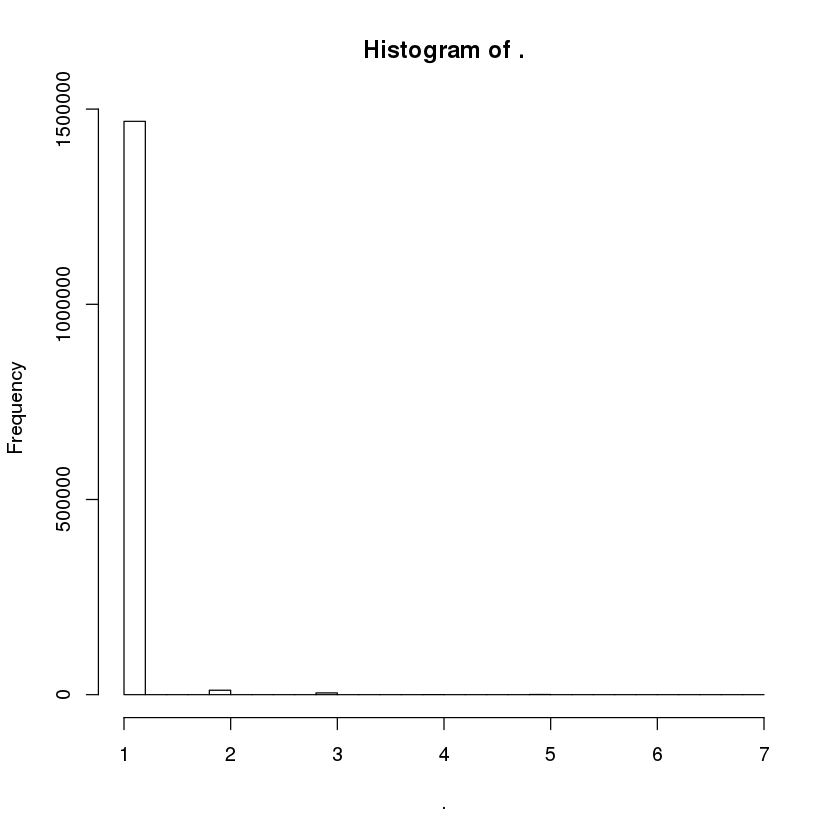

In [71]:
expiry_data_1 %>% .$reg_durY %>% hist()

In [72]:
expiry_data_1 %>%  group_by(reg_durY,renewal_status) %>% tally()# %>% table() %>% prop.table()

reg_durY,renewal_status,n
<dbl>,<chr>,<int>
1,Not Renewd,1340045
1,Renewed,128618
2,Not Renewd,5802
2,Renewed,5547
3,Not Renewd,3262
3,Renewed,1284
4,Not Renewd,31
4,Renewed,29
5,Not Renewd,239


# Create Quarter, Month, DoW vars

In [73]:
expiry_data_1 %>% select(creation_date, renewal_status) %>% head()

creation_date,renewal_status
<date>,<chr>
2019-01-01,Not Renewd
2019-01-01,Not Renewd
2019-01-01,Not Renewd
2019-01-01,Not Renewd
2019-01-01,Not Renewd
2019-01-01,Not Renewd


In [74]:
expiry_data_1[1,'creation_date'] %>% .$creation_date

[1] "2019-01-01"

In [75]:
expiry_data_1 <- expiry_data_1 %>% mutate(
    mday = mday(creation_date),
    wday = wday(creation_date),
    qday = qday(creation_date),
    yday = yday(creation_date)
    
)

In [76]:
expiry_data_1 %>% select(creation_date, mday,wday,qday,yday,renewal_status) %>% tail()

creation_date,mday,wday,qday,yday,renewal_status
<date>,<int>,<dbl>,<dbl>,<dbl>,<chr>
2019-05-31,31,6,61,151,Not Renewd
2019-05-31,31,6,61,151,Not Renewd
2019-05-31,31,6,61,151,Not Renewd
2019-05-31,31,6,61,151,Not Renewd
2019-05-31,31,6,61,151,Not Renewd
2019-05-31,31,6,61,151,Not Renewd


In [77]:
expiry_data_1 %>%  group_by(wday,renewal_status) %>% tally()

wday,renewal_status,n
<dbl>,<chr>,<int>
1,Not Renewd,121009
1,Renewed,12756
2,Not Renewd,218893
2,Renewed,21053
3,Not Renewd,236474
3,Renewed,23010
4,Not Renewd,223864
4,Renewed,22746
5,Not Renewd,203977


# Add creation vars to expiry test & train split

In [3]:
expiry_train_df_1 <- expiry_train_df_1 %>% mutate(
    reg_durY = as.numeric(floor(difftime(expiry_date,creation_date)/365)),
    mday = mday(creation_date),
    wday = wday(creation_date),
    qday = qday(creation_date),
    yday = yday(creation_date) 
)

expiry_test_df_1 <- expiry_test_df_1 %>% mutate(
    reg_durY = as.numeric(floor(difftime(expiry_date,creation_date)/365)),
    mday = mday(creation_date),
    wday = wday(creation_date),
    qday = qday(creation_date),
    yday = yday(creation_date) 
)

In [4]:
names(expiry_train_df_1)

[1] "renewal_type"         "renewed_count"        "expiry_date"         
 [4] "domain_id"            "domain"               "creation_date"       
 [7] "status"               "tld"                  "registrar"           
[10] "reseller"             "reseller_country"     "region"              
[13] "reg_period"           "registrant_country"   "renewal_status"      
[16] "renew_mbg"            "renew_type"           "autorenew_type"      
[19] "renew_date"           "renew_registrar"      "renew_reseller"      
[22] "reg_revenue"          "reg_arpt"             "renew_period"        
[25] "renew_domain_revenue" "renew_arpt"           "reg_arpt_org"        
[28] "tld_registrar_index"  "sld"                  "sld_type"            
[31] "sld_length"           "sld_type2"            "day_domains"         
[34] "log_reg_arpt"         "gibb_score"           "pattern"             
[37] "cluster"              "pattern_score"        "pattern_domain_count"
[40] "reg_durY"             "mday"                 "wday"                
[43] "qday"                 "yday"

# Rerun glm w & w/o new creation vars

## w/o creation vars

In [5]:
agg_glm_basic_model <- build_model_first_renewal_agg(expiry_train_df_1)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [6]:
agg_glm_basic_pred <- predict_first_renewal_agg(expiry_test_df_1, agg_glm_basic_model)

In [10]:
save(agg_glm_basic_model, file="../../data/output/agg_glm_basic_model")
save(agg_glm_basic_pred, file="../../data/output/agg_glm_basic_pred")

In [16]:
rm(agg_glm_basic_model,agg_glm_basic_pred)

In [17]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,5285579,282.3,10025322,535.5,6299494,336.5
Vcells,595576252,4543.9,2752022540,20996.3,3165451350,24150.5


## w/ creation vars

In [12]:
agg_glm_plus_model <- build_model_first_renewal_agg_plus(expiry_train_df_1)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [20]:
agg_glm_plus_model


Call:  glm(formula = renewal_status ~ ., family = binomial(link = "logit"), 
    data = build_data, model = FALSE, y = FALSE)

Coefficients:
                       (Intercept)                pattern_domain_count  
                        -4.934e-01                          -1.179e-01  
                      log_reg_arpt                          sld_length  
                         3.988e-02                          -2.075e-02  
                         sld_typel                          sld_typeln  
                        -1.056e-01                          -7.380e-01  
                 sld_typehyphen-ln                         sld_typeidn  
                        -6.409e-01                           2.322e-01  
                         sld_typen                         day_domains  
                        -1.432e+00                          -1.585e-03  
                        gibb_score                          reg_period  
                         1.255e-02                     

In [24]:
agg_glm_plus_pred <- predict_first_renewal_agg_plus(expiry_test_df_1, agg_glm_plus_model)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [25]:
# save(agg_glm_plus_model, file="../../data/output/agg_glm_plus_model")
save(agg_glm_plus_pred, file="../../data/output/agg_glm_plus_pred")

# Write to gcp

In [15]:

system("gsutil cp /home/jupyter/local/Domains_202003/data/output/* gs://data_outputt/output/")
system("mv /home/jupyter/local/Domains_202003/data/output/* /home/jupyter/local/Domains_202003/data/")

[1] 1